In [14]:
import numpy as np
import matplotlib.pyplot as plt

from uproot_io import Events, View

In [15]:
# Interaction type lookup
import csv
interaction_dictionary = {}
with open('interactions.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        key = int(row.pop('Idx'))
        interaction = row.pop('Interaction')
        interaction_dictionary[key] = interaction
# print(interaction_dictionary)

In [16]:
events = Events("/Users/mohammed/code/PandoraRecoFile_1.root")

In [4]:
events.event_number

array([   0,    0,    0, ..., 9208, 9208, 9208], dtype=int32)

In [5]:
events.mc_pdg

array([  22,   22, 2212, ...,   22,   22,   22], dtype=int32)

In [6]:
def plotparticles(event_number):
    idx = np.where(events.event_number == event_number)[0]
    
    residuals = np.array([])
    
    for i in idx:
        x = events.reco_hits_x_w[i]
        z = events.reco_hits_w[i]
        pdg = events.mc_pdg[i]
        
        if x.size == 0:
            continue
            
        else:
            m, c = np.polyfit(x, z, 1)
        
        pred = m * x + c
        resd = np.mean(np.abs(z - pred))
        residuals = np.append(residuals, resd)

        
#         plt.scatter(x, z, s=10)
#         plt.plot(x, pred)
#         print(f"Particle {i} and Particle type {pdg}: {resd}")
    
    vx = events.true_neutrino_vtx_x[idx[0]]
    vz = events.true_neutrino_vtx_w[idx[0]]
#     plt.scatter(vx, vz, c='red', s=50)
    
    typ = events.interaction_type[idx[0]]
    name = interaction_dictionary[typ]
    
#     plt.title(f'Interaction Type: {name}')
#     plt.xlabel('Time')
#     plt.ylabel('W Wire')
    
    return residuals

In [7]:
eventNumbers = list(set(events.event_number))
# print(eventNumbers)

/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_30801/3126761335.py:15: RankWarning: Polyfit may be poorly conditioned
  m, c = np.polyfit(x, z, 1)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_30801/3126761335.py:15: RankWarning: Polyfit may be poorly conditioned
  m, c = np.polyfit(x, z, 1)
/var/folders/0j/k5n00ph57w3c1tdfq0lwsgn00000gn/T/ipykernel_30801/3126761335.py:15: RankWarning: Polyfit may be poorly conditioned
  m, c = np.polyfit(x, z, 1)


(array([4.0781e+04, 2.6950e+03, 1.3880e+03, 4.3800e+02, 1.3000e+02,
        6.6000e+01, 2.7000e+01, 2.4000e+01, 1.6000e+01, 1.1000e+01,
        7.0000e+00, 1.1000e+01, 5.0000e+00, 7.0000e+00, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00]),
 array([  0.        ,  13.15212722,  26.30425444,  39.45638166,
         52.60850888,  65.7606361 ,  78.91276332,  92.06489054,
        105.21701776, 118.36914498, 131.52127221, 144.67339943,
        157.82552665, 170.97765387, 184.12978109, 197.28190831,
        210.43403553, 223.58616275, 236.73828997, 249.89041719,
        263.04254441, 276.19467163]),
 <BarContainer object of 21 artists>)

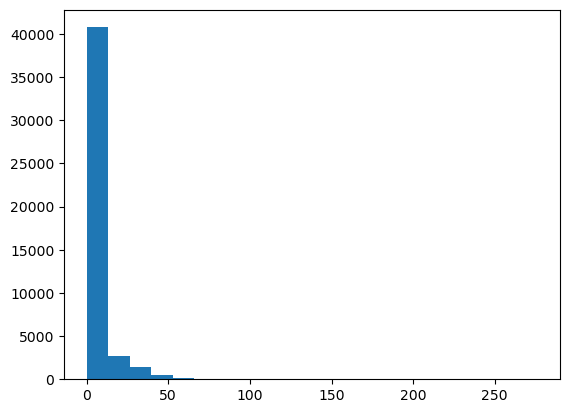

In [13]:
r = []
for i in eventNumbers:
    r = np.append(r, plotparticles(i))

plt.hist(r, 21)